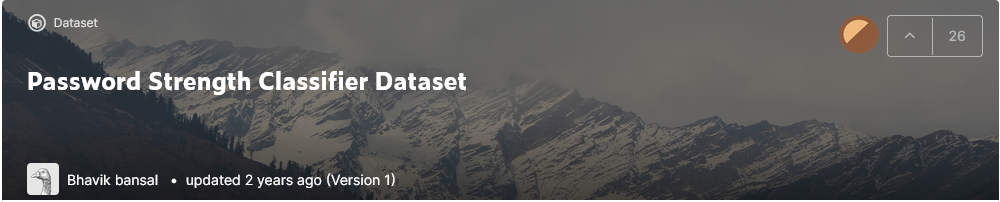

kaggle: https://www.kaggle.com/bhavikbb/password-strength-classifier-dataset

### Description

The passwords used in our analysis are from 000webhost leak that is available online. How did we figure out which passwords were stronger and which were weaker? Well, there is a tool called PARS by Georgia Tech university which have all the commercial password meters integrated into it. All I did was give that tool all the passwords and it gave me new files for each commercial password strength meter. The files contained the passwords with one more column i.e their strength based on the commercial password strength meters.
The commercial password strength algorithms I used are of Twitter, Microsoft and battle. How is this algorithm different from these strength meters? First of all, it is entirely based on machine learning rather than on rules. Secondly, I only kept those passwords that were flagged weak, medium and strong by all three strength meters. This means that all the passwords were indeed either weak, medium or strong.

I had a total of 3 million passwords but after taking the intersection of all classifications of commercial meters, I was left with 0.7 million passwords. The reduction was because of the fact that I only used passwords that were flagged in a particular category by all three algorithms.

### Task

Classify a given password to weak medium or strong

In [36]:
#Load important libraries
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
data=pd.read_csv('data/data.csv',error_bad_lines=False )

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

In [38]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [39]:
data.shape

(669640, 2)

Password - 669640 unique values for password collected online

Strength - three values(0 , 1 , 2) i.e. 0 for weak, 1 for medium, 2 for strong.<br/>
Strength of the password based on rules(such as containing digits, special symbols , etc.)

In [40]:
#Check if we have null values
data.isnull().sum()

password    1
strength    0
dtype: int64

In [41]:
#Drop null values rows
data=data.dropna()

In [43]:
data.shape

(669639, 2)

We are left with 669639 unique password after removing null 

In [44]:
data=data.reset_index(drop=True) #reindex the data

In [45]:
data = data.sample(frac=1).reset_index(drop=True) #suffling for robutness

In [47]:
data.head()

,password,strength
0,VCPLlYDA5OQ6fXq2,2
1,cuminass123,1
2,JE4eBhDQwMARHuL4,2
3,indorama2,1
4,mountain420,1


In [54]:
y=data['strength']
X=data['password']

In [49]:
#See the distribution of classes
import seaborn as sns

<AxesSubplot:xlabel='strength', ylabel='count'>

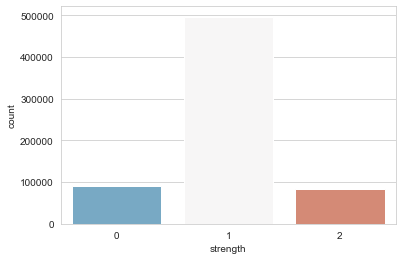

In [50]:
%matplotlib inline
sns.set_style('whitegrid')
sns.countplot(x='strength',data=data,palette='RdBu_r')

In [51]:
X

0         VCPLlYDA5OQ6fXq2
1              cuminass123
2         JE4eBhDQwMARHuL4
3                indorama2
4              mountain420
                ...       
669634          paradai123
669635            rawa2508
669636            celtic11
669637          777consult
669638    QH6lDOTAzMgwwG4c
Name: password, Length: 669639, dtype: object

In [52]:
def word_to_char(word):
    return list(word)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=word_to_char)
X=vectorizer.fit_transform(X)

In [56]:
X.shape

(669639, 153)

In [57]:
vectorizer.vocabulary_

{'v': 77,
 'c': 58,
 'p': 71,
 'l': 67,
 'y': 80,
 'd': 59,
 'a': 56,
 '5': 39,
 'o': 70,
 'q': 72,
 '6': 40,
 'f': 61,
 'x': 79,
 '2': 36,
 'u': 76,
 'm': 68,
 'i': 64,
 'n': 69,
 's': 74,
 '1': 35,
 '3': 37,
 'j': 65,
 'e': 60,
 '4': 38,
 'b': 57,
 'h': 63,
 'w': 78,
 'r': 73,
 't': 75,
 '0': 34,
 'g': 62,
 '9': 43,
 '@': 49,
 '.': 32,
 '8': 42,
 '_': 54,
 '-': 31,
 'z': 81,
 'k': 66,
 '$': 24,
 '7': 41,
 '/': 33,
 '%': 25,
 'ä': 119,
 '±': 99,
 ';': 44,
 '*': 29,
 '&': 26,
 '#': 23,
 '?': 48,
 '¡': 90,
 '!': 21,
 ' ': 20,
 '+': 30,
 '=': 46,
 ']': 52,
 '[': 50,
 '^': 53,
 ')': 28,
 '<': 45,
 'þ': 142,
 '³': 101,
 '>': 47,
 '(': 27,
 '}': 84,
 'ú': 138,
 '\\': 51,
 '~': 85,
 '\x05': 3,
 '{': 82,
 'â': 117,
 'ó': 132,
 '"': 22,
 '÷': 136,
 '\x11': 9,
 '`': 55,
 '\x12': 10,
 '|': 83,
 '\x7f': 86,
 '\x1c': 17,
 '\x1b': 16,
 'ü': 140,
 'í': 126,
 '¨': 95,
 '\x16': 12,
 '\x1e': 19,
 '—': 146,
 'ð': 129,
 'å': 120,
 'ï': 128,
 'ÿ': 143,
 '\x13': 11,
 '\x1d': 18,
 '°': 98,
 'ß': 114,
 'ñ': 

In [58]:
data.iloc[0,0]

'VCPLlYDA5OQ6fXq2'

In [59]:
#check the first password tfidf value

feature_names=vectorizer.get_feature_names()
first_document_vector=X[0]

#print the scores
df=pd.DataFrame(first_document_vector.T.todense(),index=feature_names,columns=['TFIDF'])
df.sort_values(by=['TFIDF'],ascending=False)

,TFIDF
q,0.528462
l,0.401692
x,0.265164
f,0.255199
v,0.251187
...,...
9,0.000000
8,0.000000
7,0.000000
4,0.000000


In [60]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

### Logistics Regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
log_clf=LogisticRegression(penalty='l2',multi_class='ovr',solver='liblinear')
log_clf.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [64]:
y_pred=log_clf.predict(X_test)

In [65]:
print('accuracy_score',metrics.accuracy_score(y_test,y_pred))

accuracy_score 0.811779463592378


In [66]:
print('confusion_matrix',metrics.confusion_matrix(y_test,y_pred))

confusion_matrix [[ 3175 14649    30]
 [ 2088 95105  2338]
 [   82  6021 10440]]


we are getting 81% accuracy with Logistic Regression without hyper parameter tuning

### Hyper parameter tuning Logistic Regression

In [67]:
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV,RandomizedSearchCV

In [68]:
model = LogisticRegression(multi_class='ovr')
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
random_search_CV = RandomizedSearchCV(estimator=model,param_distributions=grid,cv=10,verbose=2,
                                      scoring='accuracy',error_score=0,return_train_score=True)

In [69]:
random_search_result = random_search_CV.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ................C=1.0, penalty=l2, solver=liblinear; total time=  11.9s
[CV] END ................C=1.0, penalty=l2, solver=liblinear; total time=  11.9s
[CV] END ................C=1.0, penalty=l2, solver=liblinear; total time=  11.7s
[CV] END ................C=1.0, penalty=l2, solver=liblinear; total time=  11.6s
[CV] END ................C=1.0, penalty=l2, solver=liblinear; total time=  12.6s
[CV] END ................C=1.0, penalty=l2, solver=liblinear; total time=  12.2s
[CV] END ................C=1.0, penalty=l2, solver=liblinear; total time=  12.1s
[CV] END ................C=1.0, penalty=l2, solver=liblinear; total time=  11.6s
[CV] END ................C=1.0, penalty=l2, solver=liblinear; total time=  11.9s
[CV] END ................C=1.0, penalty=l2, solver=liblinear; total time=  12.6s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   3.9s
[CV] END ...............C=0.01, penalty=l2, so

C:\Users\navin.prasad\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=  19.0s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=  18.8s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=  18.9s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=  14.7s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=  15.5s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=  15.5s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=  19.7s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=  16.7s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=  17.1s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=  16.7s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=  16.6s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=  18.9s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=  17.9s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=  16.4s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=  16.2s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=  17.4s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=  46.4s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=  45.5s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=  50.1s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=  47.3s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=  46.9s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=  55.1s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=  56.8s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=  56.7s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=  52.4s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=  49.1s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   9.5s
[CV] END ...................

C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=  17.8s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=  19.3s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=  18.2s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=  19.8s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=  15.7s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=  19.4s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=  18.8s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=  19.2s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=  17.4s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=  17.8s
[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=  31.2s
[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=  31.1s
[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=  38.1s
[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=  33.3s
[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=  31.9s
[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=  30.0s
[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=  31.9s
[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=  32.7s
[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=  30.7s
[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=  30.2s


In [70]:
random_search_CV.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}

In [71]:
random_search_CV.best_estimator_

LogisticRegression(C=10, multi_class='ovr', solver='newton-cg')

In [72]:
final_model=LogisticRegression(C=10, multi_class='ovr', solver='newton-cg')
final_model.fit(X_train,y_train)

LogisticRegression(C=10, multi_class='ovr', solver='newton-cg')

In [75]:
y_pred=final_model.predict(X_test)

In [76]:
print('accuracy_score',metrics.accuracy_score(y_test,y_pred))

accuracy_score 0.8131832029149991


In [77]:
print('confusion_matrix',metrics.confusion_matrix(y_test,y_pred))

confusion_matrix [[ 3295 14526    33]
 [ 2151 95016  2364]
 [   70  5876 10597]]


We can not see much improvement with RandomizedSearchCV

### XGBoost Classifier

In [110]:
import xgboost as xgb

In [111]:
xgb_clf=xgb.XGBClassifier()
xgb_clf.fit(X_train,y_train)

C:\Users\navin.prasad\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:50:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [112]:
y_pred=xgb_clf.predict(X_test)

In [113]:
print('accuracy_score',metrics.accuracy_score(y_test,y_pred))
print('confusion_matrix',metrics.confusion_matrix(y_test,y_pred))

accuracy_score 0.9808255181888776
confusion_matrix [[16824  1029     1]
 [  591 98623   317]
 [    3   627 15913]]


we are getting 98% accuracy with Xgboost classifier

### Save vectorizer and final model,load and use it for some password

In [117]:
### Save the vectorizer and xgb_clf object as final model as this is giving very good accuracy
import pickle
pickle.dump(vectorizer, open("tfidf_password_strength.pickle", "wb"))
pickle.dump(xgb_clf, open("final_model.pickle", "wb"))

In [118]:
#Loading vectorizer from pickle file

file = open("tfidf_password_strength.pickle",'rb')
saved_vectorizer = pickle.load(file)
file.close()

In [120]:
#Loading model from pickle file

file = open("final_model.pickle",'rb')
final_model = pickle.load(file)
file.close()

In [121]:
X_password=np.array(['abc'])
print(X_password)
X_predict=saved_vectorizer.transform(X_password)
y_pred=final_model.predict(X_predict)
print(y_pred)

['abc']
[0]


In [122]:
X_password=np.array(['abc@123'])
print(X_password)
X_predict=saved_vectorizer.transform(X_password)
y_pred=final_model.predict(X_predict)
print(y_pred)

['abc@123']
[1]


In [123]:
X_password=np.array(['abc@123$##'])
print(X_password)
X_predict=saved_vectorizer.transform(X_password)
y_pred=final_model.predict(X_predict)
print(y_pred)

['abc@123$##']
[2]
